In [1]:
import os
import numpy as np
import random
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

# Data List Loading

In [2]:
rename = {
    'Baboon_': 'Baboon',
    'Elephant_': 'Elephant',
    'Honey_badger_': 'Honey_badger',
    'Honey_Badger': 'Honey_badger',
    'Mongoose_larger_gray': 'Mongoose_larger_grey',
    'Hippopotamus': 'Hippo'
}

In [3]:
seas_min_all_count = {1: 70, 2: 25}
seas_min_test_count = {1: 50, 2: 20}
root = '/home/zhmiao/datasets/ecology/Mozambique/'
season = 2
data_list_ori = [os.path.join(root, 'SplitLists', 'Mozambique_season_{}_all.txt.ori'.format(season)) for season in [1, 2]]

In [4]:
data_list_ori

['/home/zhmiao/datasets/ecology/Mozambique/SplitLists/Mozambique_season_1_all.txt.ori',
 '/home/zhmiao/datasets/ecology/Mozambique/SplitLists/Mozambique_season_2_all.txt.ori']

In [5]:
file_list = []
label_list = []
sec_list = []

for data_list in data_list_ori:
    
    with open(data_list, 'r') as f:
        
        for line in tqdm(f):
            
            line = line.replace('  ', ' ')
            
            if 'Honey Badger' in line:
                line = line.replace('Honey Badger', 'Honey_badger')
                
            if 'Mongoose_white tailed' in line:
                line = line.replace('Mongoose_white tailed', 'Mongoose_white_tailed')
                
            line_sp = line.split(' ')
            file = line_sp[0]
            label = line_sp[1]
            sec = line_sp[2]
            
            if file.split('/')[1] in rename.keys():
                file_sp = file.split('/')
                file_sp[1] = rename[file_sp[1]]
                file = '/'.join(file_sp)
                
            if os.path.exists(os.path.join(root, file)):
                file_list.append(file)
                label_list.append(label)
                sec_list.append(float(sec.replace('\n', '')))
            else:
                print(os.path.join(root, file))
            #if os.path.exists(os.path.join(root, file)):
            #    file_list.append(file)
            #    label_list.append(label)
        
file_list = np.array(file_list)
label_list = np.array(label_list)
sec_list = np.array(sec_list)

36650it [02:38, 5783.14it/s]

/home/zhmiao/datasets/ecology/Mozambique/Mozambique_season_1/Sable/B07_EK000073.JPG
/home/zhmiao/datasets/ecology/Mozambique/Mozambique_season_1/Sable/B07_EK000074.JPG


40884it [02:39, 5788.61it/s]

/home/zhmiao/datasets/ecology/Mozambique/Mozambique_season_1/Mongoose_large_gray/C06_2016_08_31_08_54_55.JPG
/home/zhmiao/datasets/ecology/Mozambique/Mozambique_season_1/Mongoose_large_gray/C06_2016_08_31_08_54_56.JPG


126053it [02:41, 33975.48it/s]

/home/zhmiao/datasets/ecology/Mozambique/Mozambique_season_1/Mongoose_large_gray/F07_2016_10_22_10_08_12.JPG
/home/zhmiao/datasets/ecology/Mozambique/Mozambique_season_1/Mongoose_large_gray/F07_2016_10_22_10_08_13.JPG


313020it [02:47, 1869.63it/s] 
323582it [01:19, 4062.51it/s] 


In [7]:
unique_labels, label_counts = np.unique(label_list, return_counts=True)

Ghost


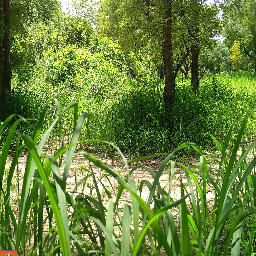

In [69]:
i = np.random.randint(0, len(file_list))
print(label_list[i])
Image.open(os.path.join(root, file_list[i]))

In [71]:
# min_count = seas_min_all_count[season]

min_count = 50

cat_sel = [(cat, count)
           for cat, count in zip(unique_labels[label_counts > min_count], label_counts[label_counts > min_count]) 
           if 'nknown' not in cat
           and 'other' not in cat
           and cat not in ['Ghost', 'Human', 'Fire', 'Setup', 'Rodent']]

sorted_ids = sorted(cat_sel, key=lambda x : x[1], reverse=True)

In [75]:
sorted_ids

[('Waterbuck', 52757),
 ('Baboon', 48936),
 ('Warthog', 34800),
 ('Bushbuck', 20065),
 ('Impala', 19331),
 ('Oribi', 8328),
 ('Elephant', 6026),
 ('Genet', 4202),
 ('Nyala', 4021),
 ('Bushpig', 2362),
 ('Porcupine', 2302),
 ('Civet', 2114),
 ('Vervet', 2051),
 ('Reedbuck', 1896),
 ('Kudu', 1584),
 ('Buffalo', 1448),
 ('Sable_antelope', 1073),
 ('Duiker_red', 1056),
 ('Hartebeest', 914),
 ('Wildebeest', 914),
 ('Guineafowl_helmeted', 821),
 ('Hare', 520),
 ('Duiker_common', 507),
 ('Mongoose_marsh', 428),
 ('Aardvark', 293),
 ('Honey_badger', 292),
 ('Hornbill_ground', 243),
 ('Mongoose_slender', 215),
 ('Mongoose_bushy_tailed', 211),
 ('Samango', 149),
 ('Mongoose_white_tailed', 134),
 ('Mongoose_banded', 120),
 ('Mongoose_large_grey', 109),
 ('Bushbaby', 89),
 ('Guineafowl_crested', 66),
 ('Eland', 64),
 ('Lion', 62),
 ('Mongoose_dwarf', 61),
 ('Serval', 61)]

In [78]:
cls_ids = np.arange(len(sorted_ids))

In [156]:
cls_ids_event = []

np.random.seed(45)

np.random.shuffle(cls_ids)
cls_ids_event.append([i for i in cls_ids[:20]])

np.random.shuffle(cls_ids)
cls_ids_event.append([i for i in cls_ids[:20]])

np.random.shuffle(cls_ids)
cls_ids_event.append([i for i in cls_ids[:20]])

In [159]:
cls_ids_event_sorted = np.array([sorted(l) for l in cls_ids_event])

In [160]:
cls_ids_event_sorted

array([[ 1,  2,  3,  5,  6,  7,  8, 10, 12, 15, 17, 19, 21, 25, 31, 32,
        35, 36, 37, 38],
       [ 0,  3,  5,  7,  8, 10, 11, 12, 14, 15, 16, 17, 18, 24, 25, 28,
        33, 35, 37, 38],
       [ 0,  3,  4,  5,  8, 10, 12, 13, 14, 18, 19, 23, 25, 26, 27, 28,
        29, 30, 35, 36]])

In [161]:
cls_ids_flat = cls_ids_event_sorted.reshape((1, -1))

In [163]:
unique_cls_ids, cls_ids_counts = np.unique(cls_ids_flat, return_counts=True)

In [167]:
len(cls_ids_counts)

35

In [168]:

for i in zip(unique_cls_ids, cls_ids_counts):
    
    print(i)

(0, 2)
(1, 1)
(2, 1)
(3, 3)
(4, 1)
(5, 3)
(6, 1)
(7, 2)
(8, 3)
(10, 3)
(11, 1)
(12, 3)
(13, 1)
(14, 2)
(15, 2)
(16, 1)
(17, 2)
(18, 2)
(19, 2)
(21, 1)
(23, 1)
(24, 1)
(25, 3)
(26, 1)
(27, 1)
(28, 2)
(29, 1)
(30, 1)
(31, 1)
(32, 1)
(33, 1)
(35, 3)
(36, 2)
(37, 2)
(38, 2)


<BarContainer object of 39 artists>

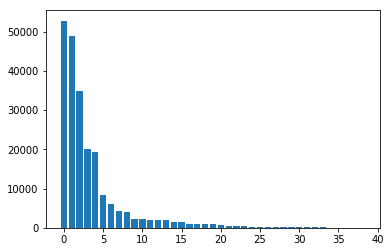

In [72]:
plt.bar(range(len(sorted_ids)), [ent[1] for ent in sorted_ids])

In [227]:
# tr_list = open(os.path.join(root, 'SplitLists', 'train_season_{}.txt'.format(season)), 'w')
# te_list = open(os.path.join(root, 'SplitLists', 'test_season_{}.txt'.format(season)), 'w')

for c in range(len(cat_sel)):

    cat = cat_sel[c][0]
    random.seed(cat_sel[c][1])
    
    file_sel = file_list[label_list == cat]
    label_sel = label_list[label_list == cat]
    sec_sel = sec_list[label_list == cat]
    
    index_group = []
    
    last_sec = 0.
    same_shoot_index = [] 
    
    for index, sec in enumerate(sec_sel):
        if len(same_shoot_index) == 0:
            same_shoot_index.append(index)
        else:
            if (sec - last_sec) < 2:
                same_shoot_index.append(index)
            else:
                index_group.append(same_shoot_index)
                same_shoot_index = [index] 
        last_sec = sec
        
    if len(same_shoot_index) > 0:
        index_group.append(same_shoot_index)
    
    random.shuffle(index_group)
    index_rand = np.array([i for g in index_group for i in g])
    
    split_ratio = 0.1
    test_counts = int(split_ratio * len(file_sel))
    
    if test_counts < seas_min_test_count[season]:
        test_counts = seas_min_test_count[season]
        
    file_sel_te = file_sel[:test_counts]
    file_sel_tr = file_sel[test_counts:]
    label_sel_te = label_sel[:test_counts]
    label_sel_tr = label_sel[test_counts:]
    
    for f, l in zip(file_sel_tr, label_sel_tr):
        tr_list.write(f + ' ' + l + '\n')
        
    for f, l in zip(file_sel_te, label_sel_te):
        te_list.write(f + ' ' + l + '\n')
    
    
tr_list.close()
te_list.close()

# CLass indexing

In [230]:
train_list_season1 = os.path.join(root, 'SplitLists', 'train_season_1.txt')
train_list_season2 = os.path.join(root, 'SplitLists', 'train_season_2.txt')

In [236]:
labels_seas_1 = []
with open(train_list_season1, 'r') as f:
    for line in f:
        labels_seas_1.append(line.split(' ')[1].replace('\n', ''))
        
labels_seas_2 = []
with open(train_list_season2, 'r') as f:
    for line in f:
        labels_seas_2.append(line.split(' ')[1].replace('\n', ''))

In [247]:
label_set_seas_1 = set(np.unique(labels_seas_1))
label_set_seas_2 = set(np.unique(labels_seas_2))

In [254]:
union_label_indices = {l:i for i, l in enumerate(np.unique(labels_seas_1))}

In [262]:
add_i = len(union_label_indices)
for add in list(label_set_seas_2 - label_set_seas_1):
    union_label_indices[add] = add_i
    add_i += 1

In [263]:
len(union_label_indices)

34

In [265]:
label_set_seas_1 - label_set_seas_2

{'Duiker_common', 'Samango'}

In [266]:
label_set_seas_2 - label_set_seas_1

{'Bushbaby'}

In [264]:
union_label_indices

{'Aardvark': 0,
 'Baboon': 1,
 'Buffalo': 2,
 'Bushbuck': 3,
 'Bushpig': 4,
 'Civet': 5,
 'Duiker_common': 6,
 'Duiker_red': 7,
 'Elephant': 8,
 'Genet': 9,
 'Guineafowl_helmeted': 10,
 'Hare': 11,
 'Hartebeest': 12,
 'Honey_badger': 13,
 'Hornbill_ground': 14,
 'Impala': 15,
 'Kudu': 16,
 'Mongoose_banded': 17,
 'Mongoose_bushy_tailed': 18,
 'Mongoose_large_grey': 19,
 'Mongoose_marsh': 20,
 'Mongoose_slender': 21,
 'Mongoose_white_tailed': 22,
 'Nyala': 23,
 'Oribi': 24,
 'Porcupine': 25,
 'Reedbuck': 26,
 'Sable_antelope': 27,
 'Samango': 28,
 'Vervet': 29,
 'Warthog': 30,
 'Waterbuck': 31,
 'Wildebeest': 32,
 'Bushbaby': 33}